In [2]:
import numpy as np
import pandas as pd

In [2]:
#df_movies = pd.read_csv('ml-25m/movies.csv')
#df_ratings = pd.read_csv('ml-25m/ratings.csv')
df_genome_scores = pd.read_csv('../ml-25m/genome-scores.csv')
df_genome_tags = pd.read_csv('../ml-25m/genome-tags.csv')

In [3]:
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [4]:
df_genome_scores.shape

(15584448, 3)

In [5]:
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [6]:
df_genome_tags.shape

(1128, 2)

In [7]:
genome_tags_and_scores = pd.merge(df_genome_scores, df_genome_tags, on = 'tagId', how = 'left')
genome_tags_and_scores = genome_tags_and_scores.rename(columns = {"relevance":"tag_relevance"})


In [8]:
genome_tags_and_scores.head()

,movieId,tagId,tag_relevance,tag
0,1,1,0.02875,007
1,1,2,0.02375,007 (series)
2,1,3,0.06250,18th century
3,1,4,0.07575,1920s
4,1,5,0.14075,1930s


From README file: "The tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.)."

In [9]:
# get the 5 most relevant tags for each movieId
# value in .tail() controls number of relevant tags
relevant_tags = genome_tags_and_scores.sort_values(['movieId', 'tag_relevance']).groupby('movieId').tail(5)
relevant_tags.head(15)

,movieId,tagId,tag_relevance,tag
63,1,64,0.98425,animation
588,1,589,0.98575,kids and family
785,1,786,0.99575,pixar animation
243,1,244,0.99875,computer animation
1035,1,1036,0.99925,toys
2078,2,951,0.93200,special effects
1715,2,588,0.95000,kids
1504,2,377,0.95175,fantasy
1331,2,204,0.95900,children
1156,2,29,0.97600,adventure


In [10]:
relevant_tags['tag'].nunique()

1063

In [19]:
relevant_tags.shape

(69080, 4)

In [11]:
movie_data = pd.read_csv('../ml-25m/movies.csv')
ratings_data = pd.read_csv('../ml-25m/ratings.csv')

In [12]:
movies_and_relevant_tags_merged = pd.merge(relevant_tags, movie_data, on = 'movieId', how = 'left')

In [13]:
movies_and_relevant_tags_merged.head()

,movieId,tagId,tag_relevance,tag,title,genres
0,1,64,0.98425,animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,589,0.98575,kids and family,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,1,786,0.99575,pixar animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,1,244,0.99875,computer animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,1,1036,0.99925,toys,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [18]:
movies_and_relevant_tags_merged.shape

(69080, 6)

In [17]:
movies_and_relevant_tags_merged.sort_values(by=['tag_relevance', 'movieId'], ascending=[False, True])
movies_and_relevant_tags_merged.head(20)

,movieId,tagId,tag_relevance,tag,title,genres
0,1,64,0.98425,animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,589,0.98575,kids and family,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,1,786,0.99575,pixar animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,1,244,0.99875,computer animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,1,1036,0.99925,toys,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,2,951,0.93200,special effects,Jumanji (1995),Adventure|Children|Fantasy
6,2,588,0.95000,kids,Jumanji (1995),Adventure|Children|Fantasy
7,2,377,0.95175,fantasy,Jumanji (1995),Adventure|Children|Fantasy
8,2,204,0.95900,children,Jumanji (1995),Adventure|Children|Fantasy
9,2,29,0.97600,adventure,Jumanji (1995),Adventure|Children|Fantasy


In [44]:
list_of_genres = ['(no genres listed)',
 'action',
 'adventure',
 'animation',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'film-noir',
 'horror',
 'IMAX',
 'musical',
 'mystery',
 'romance',
 'sci-fi',
 'thriller',
 'war',
 'western']

In [ ]:
list_of_other = ['noir', 'science fiction', ]

In [54]:
pd.to_pickle(relevant_tags,'./relevant_tags.pkl') 

In [16]:
# create list of top 5 most relevant user tags for all movies
user_tags = []

for element in relevant_tags['tag']:
    user_tags.append(element)

In [17]:
# create list of top 5 most frequent user tags for all movies
user_tags = []

for element in relevant_tags['tag']:
    user_tags.append(element)

In [18]:
from collections import Counter 

# function to find most frequent element in a list
def most_frequent(List): 
    occurence_count = Counter(List) 
    return occurence_count.most_common(1)[0][0] 

In [34]:
most_frequent(user_tags)

'original'

In [35]:
from collections import Counter 

# to find the three most frequent user_tags
tag_counts = Counter(user_tags) 
top_three = tag_counts.most_common(3) 


In [36]:
# of all the relevant tags, these are the most frequently occurring
top_three

[('original', 2016), ('comedy', 1125), ('criterion', 826)]

In [19]:
tag_counts.most_common(21)

NameError: name 'tag_counts' is not defined

In [5]:
# Start Here to avoid having to re-create the dataframe

#relevant_tags = pd.read_pickle('./relevant_tags.pkl')
#relevant_tags

,movieId,tagId,tag_relevance,tag
63,1,64,0.98425,animation
588,1,589,0.98575,kids and family
785,1,786,0.99575,pixar animation
243,1,244,0.99875,computer animation
1035,1,1036,0.99925,toys
...,...,...,...,...
15584120,206499,801,0.74475,pornography
15584174,206499,855,0.75850,road trip
15583922,206499,603,0.76725,light
15584096,206499,777,0.80825,pg-13


(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]), <a list of 10 Text xticklabel objects>)

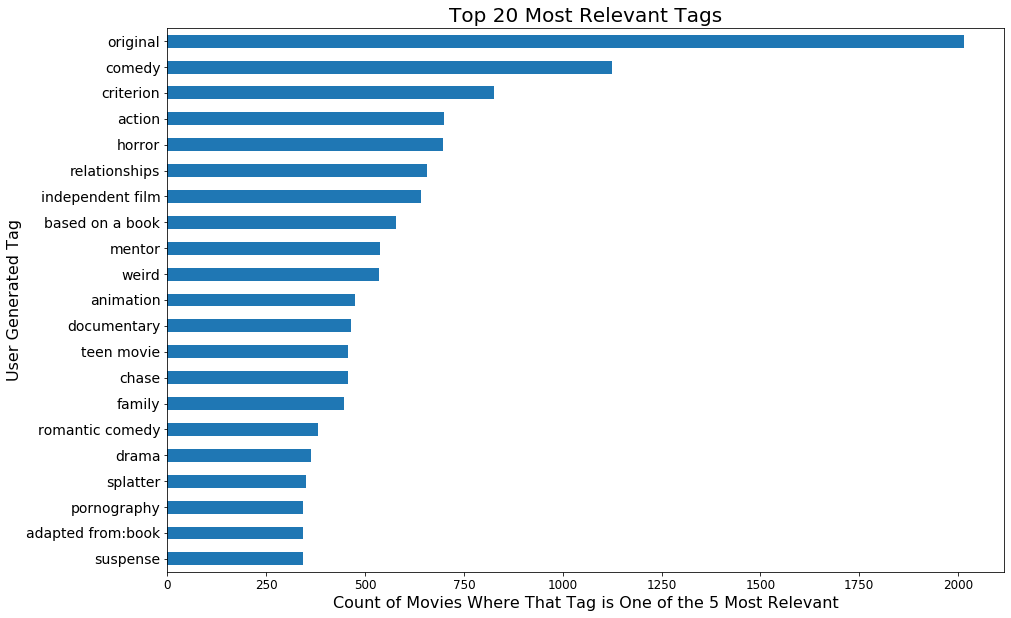

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize = (15, 10), facecolor = 'none')



relevant_tags['tag'].value_counts()[:21].sort_values().plot(kind='barh')
plt.title('Top 20 Most Relevant Tags', fontsize = 20) 
plt.xlabel('Count of Movies Where That Tag is One of the 5 Most Relevant', fontsize = 16) 
plt.ylabel('User Generated Tag', fontsize = 16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)

